This notebook was made to compare more drifter-model results, with new river channel, reduced viscosty, no_banks and reduced viscosity&old river.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime as dt
import pytz, datetime
import cStringIO
import pandas as pd
import arrow
from IPython.core.display import Image
from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools
from __future__ import division

In [2]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

In [3]:
tracersT = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_10RFdailySmoo/\
SalishSea_1h_20141008_20141010_grid_T.nc')
nc_tools.show_variables(tracersT)
ssh = tracersT.variables['sossheig']
timesteps = tracersT.variables['time_counter']
nc_tools.timestamp(tracersT, 0)

[u'deptht', u'nav_lat', u'nav_lon', u'rain_rate', u'snow_rate', u'sossheig', u'time_counter', u'time_counter_bnds', u'vosaline', u'votemper']


<Arrow [2014-10-08T00:30:00+00:00]>

In [4]:
def plotoct_mewold(lon,lat,part,start,end,start_d,end_d,day,hour,minute,duration):
    fig, axs = plt.subplots(2, 2, figsize=(11, 10))
    viz_tools.plot_coastline(axs[0,0],grid,coords='map')
    viz_tools.plot_coastline(axs[0,0],grid,coords='map',isobath=4,color='FireBrick')
    viz_tools.plot_coastline(axs[0,0],grid,coords='map',isobath=20,color='OrangeRed')
    axs[0,0].set_xlim([-123.6,-123])
    axs[0,0].set_ylim([48.8,49.4])
    axs[0,0].set_xticks([-123.6, -123.4, -123.2,-123])
    axs[0,0].set_xticklabels([-123.6, -123.4, -123.2,-123])
    axs[0,0].set_xlabel('Longitude')
    axs[0,0].set_ylabel('Latitude')
    
    colors=['g','DodgerBlue','tomato']
    for i, key in enumerate(lon.keys()):
        axs[0,0].scatter(lon[key][1:,part],lat[key][1:,part],marker='o',color=colors[i],label=key)
        axs[0,0].scatter(lon[key][0,part],lat[key][0,part],color='0.30',marker='s')
    axs[0,0].plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
    axs[0,0].legend(loc='lower left')
    
    axs[0,1].plot(timesteps[0:48],ssh[0:48,466,329],'-k')
    
    axs[0,1].set_xticklabels([])
    axs[0,1].set_ylabel('Water level (m)')
    axs[0,1].set_xlabel('Oct 8 - Oct 9 (hrs)')
    axs[0,1].set_title('sossheig, ~Point Atkinson')
        
    t=hour
    axs[0,1].plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')
    
    t2=hour+duration
    axs[0,1].plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    
    [wind_speed,wind_dir,temp,time, lat, lon] = stormtools.get_EC_observations('Sandheads',start,end)   
    #fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
    axs[1,0].plot(time,wind_speed,'-k')
    axs[1,0].set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    axs[1,0].set_xticklabels([])
    axs[1,0].set_xlabel('Oct 8 - Oct 9 (hrs)')
    axs[1,0].set_ylabel('Wind Speed (m/s)')
    axs[1,0].set_title('Sandheads')
    
    diff = 24 - hour
    hour2 = duration - diff
    day2 = day +1
    
    t=dt.datetime(2014,10,day,hour,minute)
    axs[1,0].plot([t,t],[0,10],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    axs[1,0].plot([tt,tt],[0,10],'b-',label='end')
    axs[1,0].legend(loc='upper left')

    axs[1,1].plot(time,wind_dir,'-k')
    axs[1,1].set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    axs[1,1].set_xticklabels([])
    axs[1,1].set_xlabel('Oct 8 - Oct 9 (hrs)')
    axs[1,1].set_ylabel('Wind Direction (deg CCW of E)')
    axs[1,1].set_title('Sandheads')
    
    t=dt.datetime(2014,10,day,hour,minute)
    axs[1,1].plot([t,t],[0,350],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    axs[1,1].plot([tt,tt],[0,350],'b-',label='end')
    axs[1,1].legend(loc='upper left')
    return fig

# Comparison with extended and deepened river channel

* Oct8 drop1

In [5]:
lon112={};lat112={}
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/\
12/ariane_trajectories_qualitative.nc','r')
lon112['new']=o112.variables['traj_lon']
lat112['new']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop1/\
12/ariane_trajectories_qualitative.nc','r')
lon112['reduce_viscosity']=o112.variables['traj_lon']
lat112['reduce_viscosity']=o112.variables['traj_lat']
o112 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop1/\
12/ariane_trajectories_qualitative.nc','r')
lon112['old']=o112.variables['traj_lon']
lat112['old']=o112.variables['traj_lat']

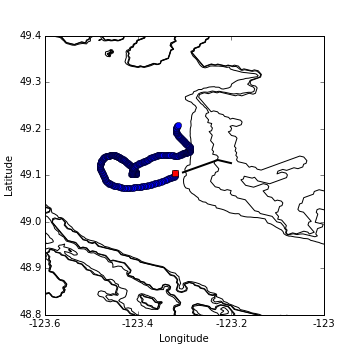

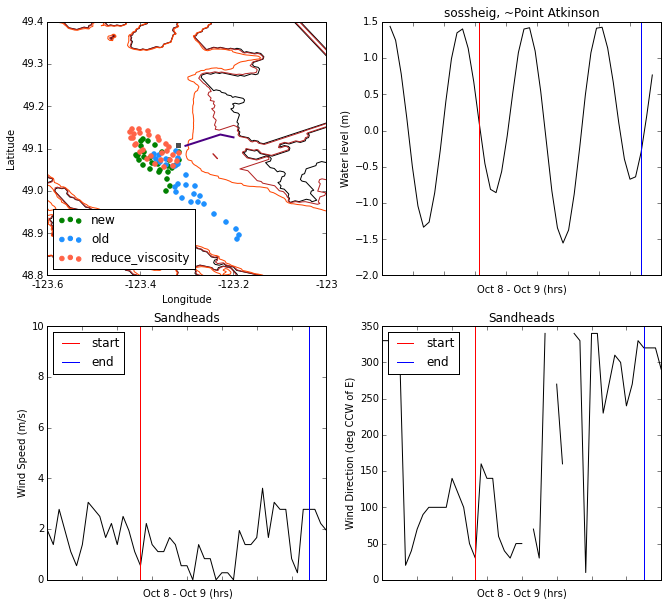

In [6]:
fig=plotoct_mewold(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

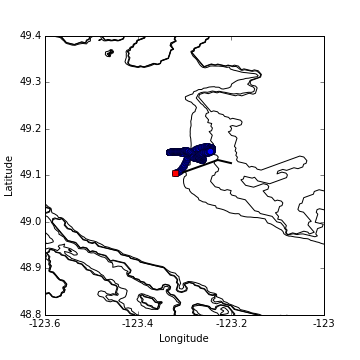

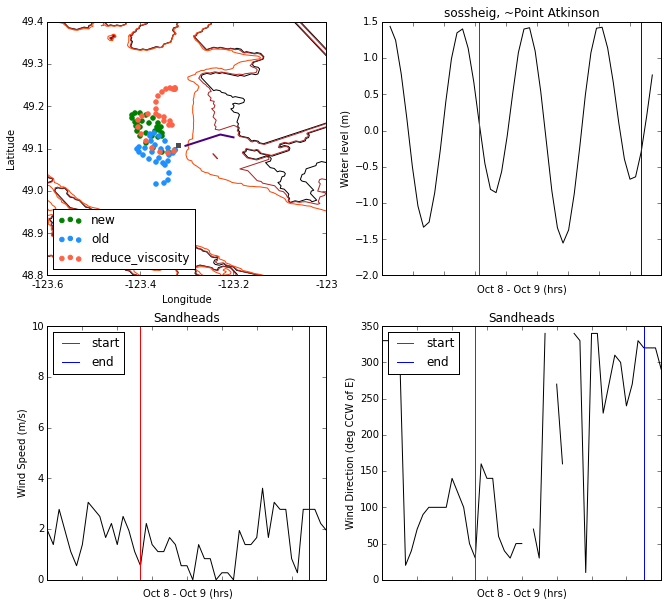

In [7]:
fig=plotoct_mewold(lon112,lat112,1,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112b.png')

In [8]:
lon13={};lat13={}
o13 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop1/\
3/ariane_trajectories_qualitative.nc','r')
lon13['new']=o13.variables['traj_lon']
lat13['new']=o13.variables['traj_lat']
o13 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop1/\
3/ariane_trajectories_qualitative.nc','r')
lon13['reduce_viscosity']=o13.variables['traj_lon']
lat13['reduce_viscosity']=o13.variables['traj_lat']
o13 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop1/\
3/ariane_trajectories_qualitative.nc','r')
lon13['old']=o13.variables['traj_lon']
lat13['old']=o13.variables['traj_lat']

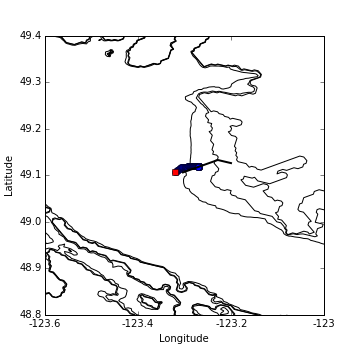

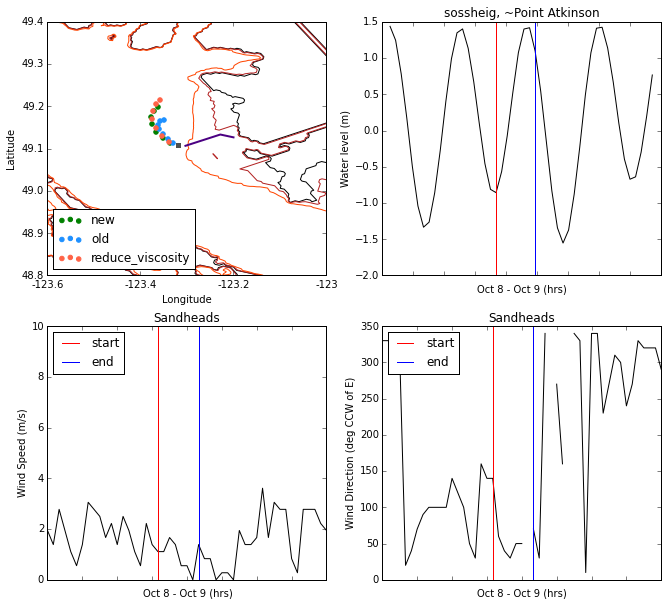

In [9]:
fig=plotoct_mewold(lon13,lat13,0,'7-Oct-2014','11-Oct-2014',8,10,8,19,0,7)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop13.png')

* Oct8 drop2

In [10]:
lon212={};lat212={}
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop2/\
12/ariane_trajectories_qualitative.nc','r')
lon212['new']=o212.variables['traj_lon']
lat212['new']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop2/\
12/ariane_trajectories_qualitative.nc','r')
lon212['reduce_viscosity']=o212.variables['traj_lon']
lat212['reduce_viscosity']=o212.variables['traj_lat']
o212 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop2/\
12/ariane_trajectories_qualitative.nc','r')
lon212['old']=o212.variables['traj_lon']
lat212['old']=o212.variables['traj_lat']

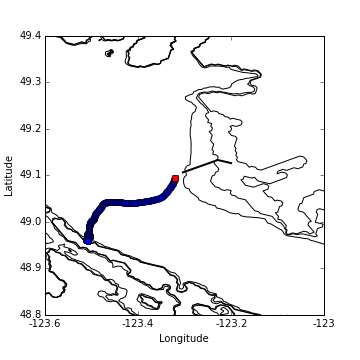

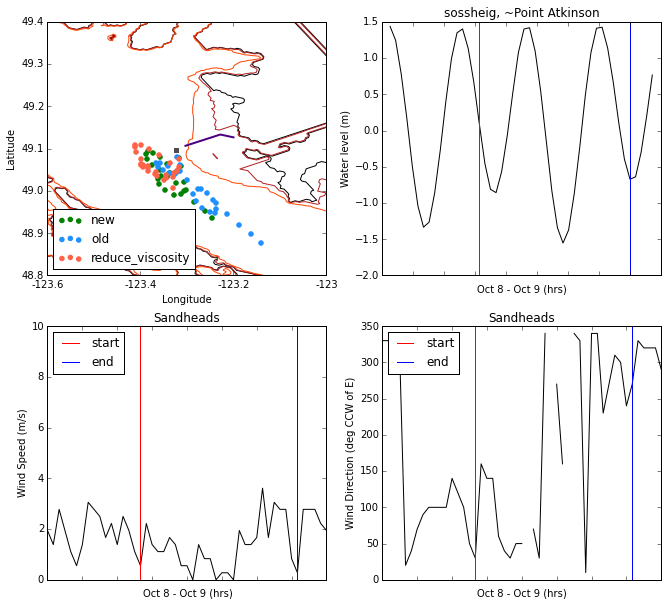

In [11]:
fig = plotoct_mewold(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212a.png')

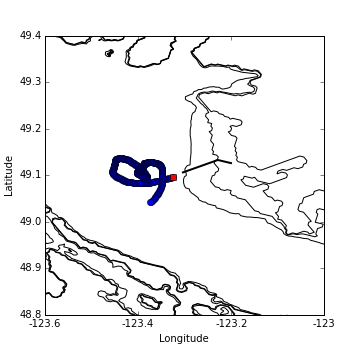

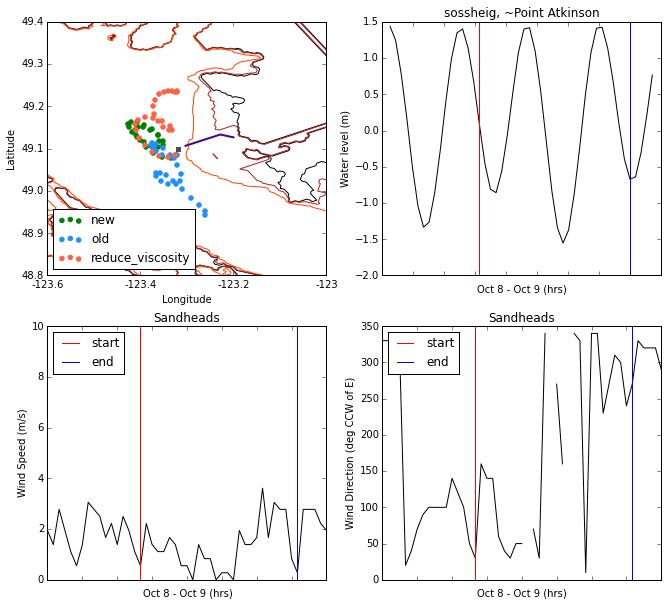

In [12]:
fig = plotoct_mewold(lon212,lat212,1,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop212b.png')

In [13]:
lon23={};lat23={}
o23 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop2/\
3/ariane_trajectories_qualitative.nc','r')
lon23['new']=o23.variables['traj_lon']
lat23['new']=o23.variables['traj_lat']
o23 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop2/\
3/ariane_trajectories_qualitative.nc','r')
lon23['reduce_viscosity']=o23.variables['traj_lon']
lat23['reduce_viscosity']=o23.variables['traj_lat']
o23 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop2/\
3/ariane_trajectories_qualitative.nc','r')
lon23['old']=o23.variables['traj_lon']
lat23['old']=o23.variables['traj_lat']

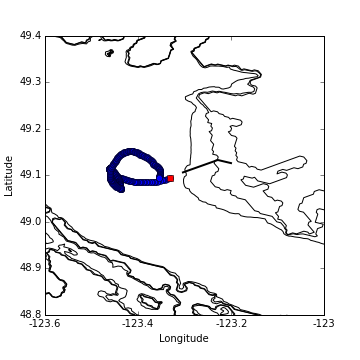

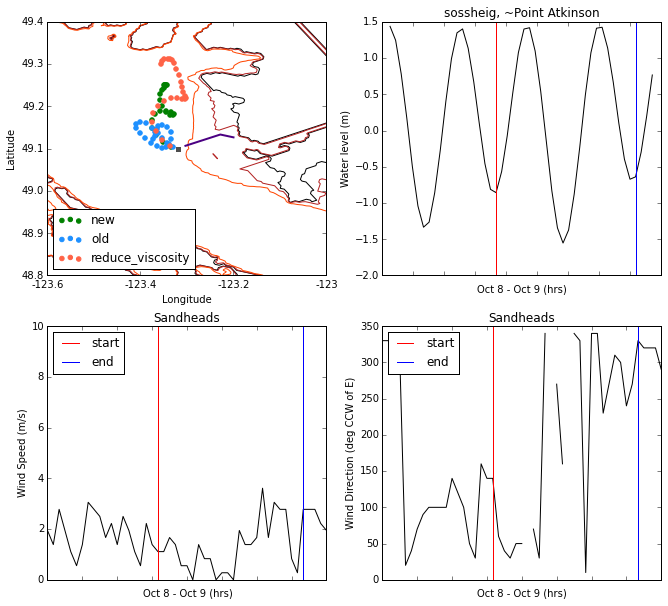

In [14]:
fig = plotoct_mewold(lon23,lat23,0,'7-Oct-2014','11-Oct-2014',8,10,8,19,0,25)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop23.png')

* Oct drop3

In [15]:
lon31={};lat31={}
o31 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop3/\
1/ariane_trajectories_qualitative.nc','r')
lon31['new']=o31.variables['traj_lon']
lat31['new']=o31.variables['traj_lat']
o31 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop3/\
1/ariane_trajectories_qualitative.nc','r')
lon31['reduce_viscosity']=o31.variables['traj_lon']
lat31['reduce_viscosity']=o31.variables['traj_lat']
o31 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop3/\
1/ariane_trajectories_qualitative.nc','r')
lon31['old']=o31.variables['traj_lon']
lat31['old']=o31.variables['traj_lat']

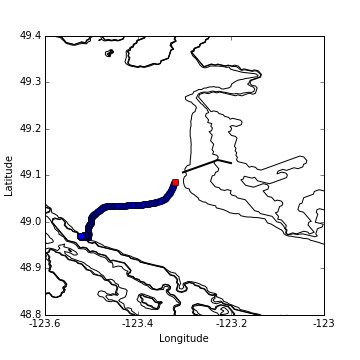

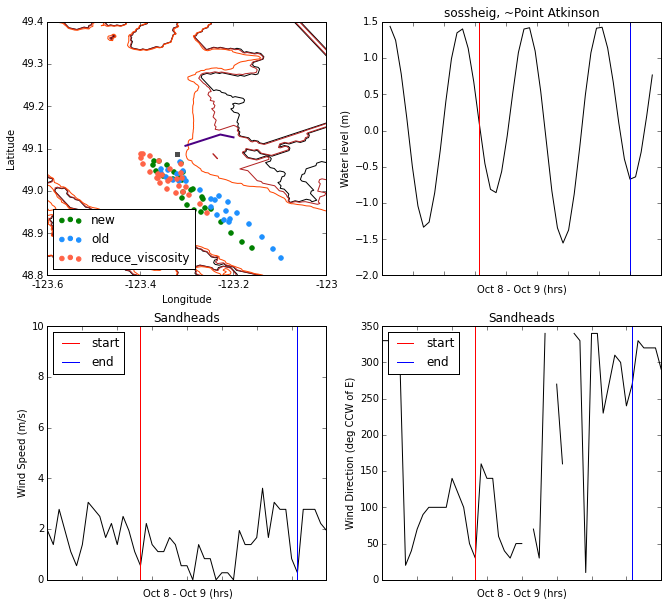

In [16]:
fig = plotoct_mewold(lon31,lat31,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,27)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop31.png')

In [17]:
lon323={};lat323={}
o323 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10RFdailySmoo/drop3/\
23/ariane_trajectories_qualitative.nc','r')
lon323['new']=o323.variables['traj_lon']
lat323['new']=o323.variables['traj_lat']
o323 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/oct8_10reduceviscosity/drop3/\
23/ariane_trajectories_qualitative.nc','r')
lon323['reduce_viscosity']=o323.variables['traj_lon']
lat323['reduce_viscosity']=o323.variables['traj_lat']
o323 = nc.Dataset('/ocean/nsoontie/MEOPAR/Ariane/results/drifters/oct8/drop3/\
23/ariane_trajectories_qualitative.nc','r')
lon323['old']=o323.variables['traj_lon']
lat323['old']=o323.variables['traj_lat']

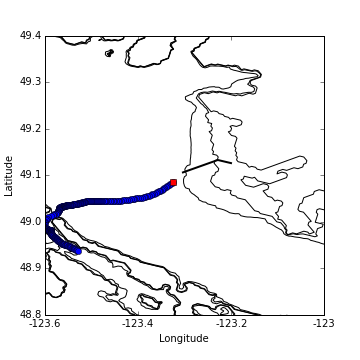

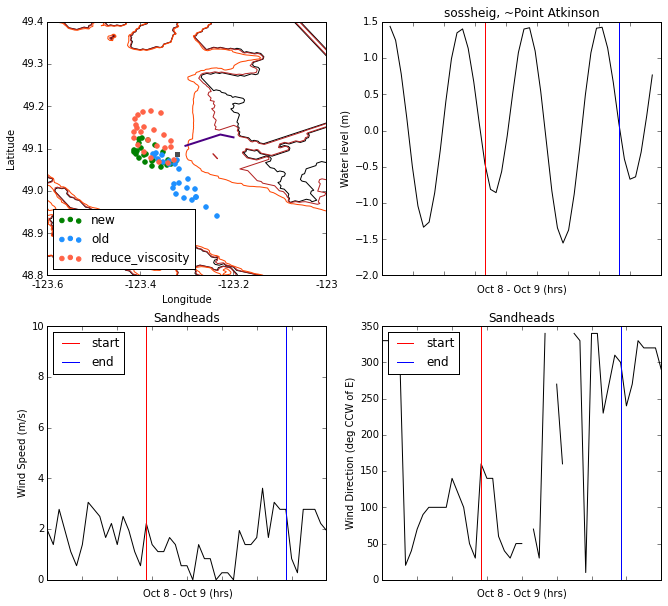

In [18]:
fig = plotoct_mewold(lon323,lat323,0,'7-Oct-2014','11-Oct-2014',8,10,8,17,0,24)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop323a.png')

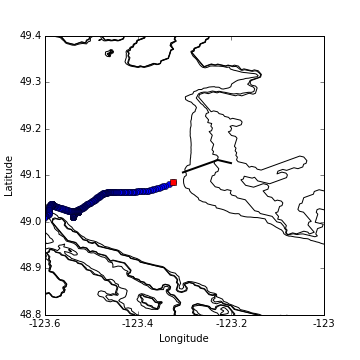

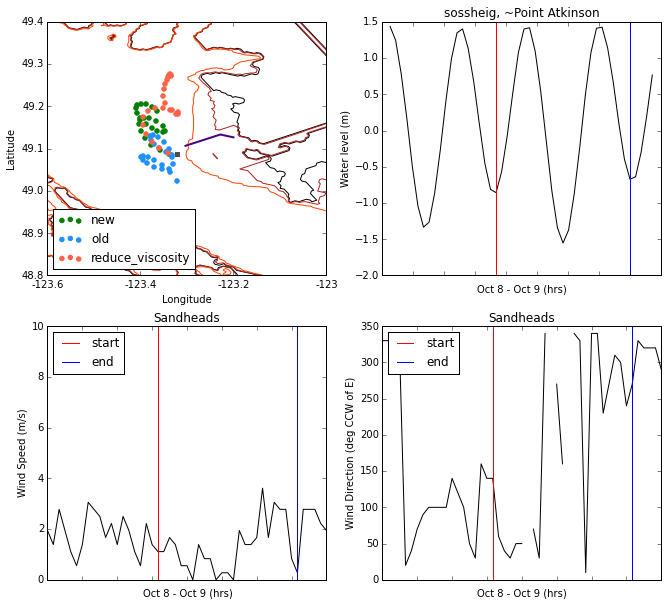

In [19]:
fig = plotoct_mewold(lon323,lat323,1,'7-Oct-2014','11-Oct-2014',8,10,8,19,0,24)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop323b.png')

* Overall, results with new river treatments are better than nowcasts except drop23. But the problem with new river is we have too much plume going northward! Does it due to lack of jetty?